In [2]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
import os

from blume.process import read, compute, plot_file, exact_m
from blume.run import ModelParameters, Results
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

T_c = 2 / np.log(1 + np.sqrt(2))

# Determine optimal $\chi$

In [29]:
results = Results(varying_param="chi", range=[chi for chi in range(10, 31)])
params = ModelParameters(T_range=[T_c], tol=1e-9, b_c=True, fixed=True, bar=False, max_steps=496)
results.get(params)

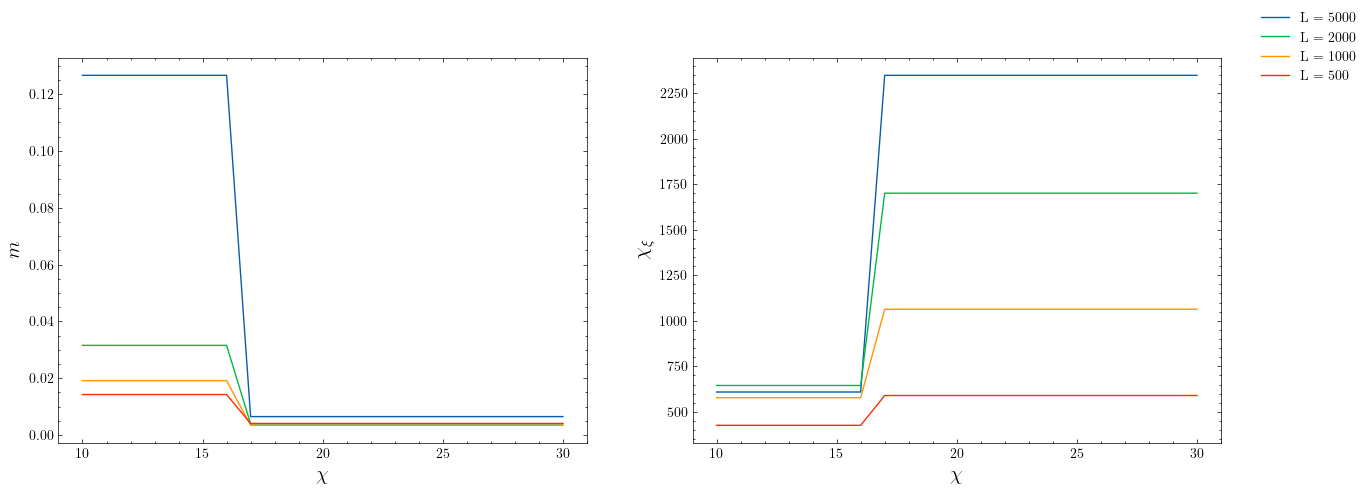

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
for dir in ["29-04 11:26", "29-04 11:41", "29-04 11:23", "29-04 11:43"]:
    mags, corrs = [], []
    chis = [chi for chi in range(10, 31)]
    for chi in chis:
        data = read(dir, f"chi{chi}")
        mags.extend(compute(Prop.m, data))
        corrs.extend(compute(Prop.xi, data))


    ax1.plot(chis, mags, "-", label=f"L = {data['max_steps']+4}")
    ax2.plot(chis, corrs, "-")

fig.legend()
ax1.set_xlabel("$\chi$", fontsize=15) 
ax1.set_ylabel("$m$", fontsize=15)
ax2.set_xlabel("$\chi$", fontsize=15)
ax2.set_ylabel(r"$\chi_{\xi}$", fontsize=15)
ax1.locator_params(axis='x', nbins=7)
ax2.locator_params(axis='x', nbins=7)

plt.show()

# Phase diagram of finite system

In [114]:
results = Results(varying_param="max_steps", range=[496, 996, 4996, 9996])
params = ModelParameters(chi = 18, T_range=(2.25, 2.29), step=0.0001, tol=1e-15, b_c=True, fixed=True)
results.get(params)

max_steps=496: 100%|██████████| 401/401 [07:28<00:00,  1.12s/it]


Saving data in folder: '29-04 20:17'
Done 



max_steps=996: 100%|██████████| 401/401 [15:05<00:00,  2.26s/it]


Saving data in folder: '29-04 20:17'
Done 



max_steps=4996: 100%|██████████| 401/401 [55:53<00:00,  8.36s/it] 


Saving data in folder: '29-04 20:17'
Done 



max_steps=9996:   8%|▊         | 32/401 [12:13<2:20:54, 22.91s/it]


KeyboardInterrupt: 

In [115]:
# Make dir for saving the plots
dir = "29-04 20:17"
path_dir = f"data/{dir}/plots"
if not os.path.isdir(path_dir):
    os.mkdir(path_dir)

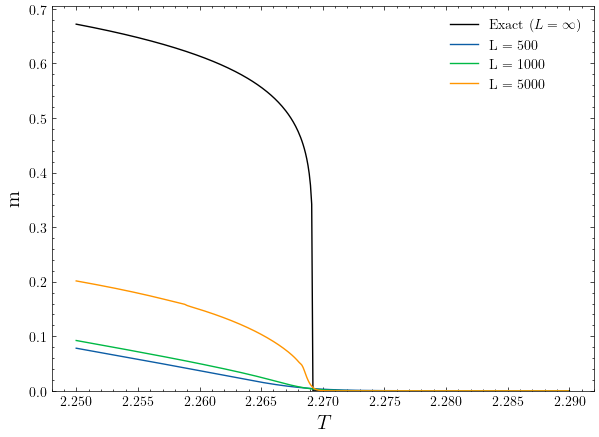

In [117]:
plt.figure(figsize=(7, 5))
T_range = (2.25, 2.29)
T, m = exact_m(T_range)
plt.plot(T, m, "k-", label="Exact ($L = \infty$)")

for size in [496, 996, 4996]:
    line = plot_file(fn=f"max_steps{size}", range=T_range, prop=Prop.m, folder=dir)
    line.set_label(f"L = {size+4}")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"m", fontsize=15)
plt.ylim(0)
plt.savefig(f"{path_dir}/magnetizations")

FileNotFoundError: [Errno 2] No such file or directory: 'data/29-04 20:17/max_steps96.json'

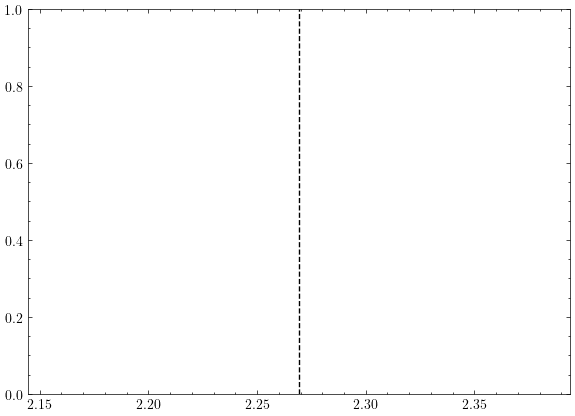

In [118]:
plt.figure(figsize=(7, 5))
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
T_range = (2.23, 2.3)
for size in [496, 996, 4996]:
    line = plot_file(fn=f"max_steps{size}", range=T_range, prop=Prop.xi, folder=dir)
    line.set_label(f"L = {size+4}")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"$\xi_{L}$", fontsize=15)
plt.savefig(f"{path_dir}/correlation length")

In [82]:
T_c = 2 / np.log(1 + np.sqrt(2))
chi_range = [chi for chi in range(10, 25)]
params = ModelParameters(T_range=[T_c],chi=20, tol=1e-9, b_c=True, fixed=True)
result = Results(varying_param="max_steps", range=[L for L in range(1000, 30000, 1000)])
result.get(params)

max_steps=1000: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=2000: 100%|██████████| 1/1 [00:04<00:00,  4.77s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=3000: 100%|██████████| 1/1 [00:07<00:00,  7.27s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=4000: 100%|██████████| 1/1 [00:09<00:00,  9.79s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=5000: 100%|██████████| 1/1 [00:11<00:00, 11.81s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=6000: 100%|██████████| 1/1 [00:14<00:00, 14.18s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=7000: 100%|██████████| 1/1 [00:16<00:00, 16.59s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=8000: 100%|██████████| 1/1 [00:19<00:00, 19.41s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=9000: 100%|██████████| 1/1 [00:21<00:00, 21.53s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=10000: 100%|██████████| 1/1 [00:24<00:00, 24.16s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=11000: 100%|██████████| 1/1 [00:25<00:00, 25.68s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=12000: 100%|██████████| 1/1 [00:25<00:00, 25.20s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=13000: 100%|██████████| 1/1 [00:25<00:00, 25.40s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=14000: 100%|██████████| 1/1 [00:25<00:00, 25.68s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=15000: 100%|██████████| 1/1 [00:25<00:00, 25.73s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=16000: 100%|██████████| 1/1 [00:24<00:00, 24.85s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=17000: 100%|██████████| 1/1 [00:25<00:00, 25.12s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=18000: 100%|██████████| 1/1 [00:24<00:00, 24.77s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=19000: 100%|██████████| 1/1 [00:24<00:00, 24.87s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=20000: 100%|██████████| 1/1 [00:25<00:00, 25.06s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=21000: 100%|██████████| 1/1 [00:25<00:00, 25.10s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=22000: 100%|██████████| 1/1 [00:25<00:00, 25.13s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=23000: 100%|██████████| 1/1 [00:24<00:00, 24.87s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=24000: 100%|██████████| 1/1 [00:24<00:00, 24.82s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=25000: 100%|██████████| 1/1 [00:24<00:00, 24.83s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=26000: 100%|██████████| 1/1 [00:25<00:00, 25.01s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=27000: 100%|██████████| 1/1 [00:25<00:00, 25.17s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=28000: 100%|██████████| 1/1 [00:25<00:00, 25.35s/it]


Saving data in folder: '29-04 16:40'
Done 



max_steps=29000: 100%|██████████| 1/1 [00:25<00:00, 25.25s/it]

Saving data in folder: '29-04 16:40'
Done 



In [96]:
mags, xis = [], []
sizes = [size for size in range(1000, 30000, 1000)]
dir = "29-04 16:40"
for size in sizes:
    data = read(folder=dir, fn=f"max_steps{size}")
    mags.extend(compute(Prop.m, data))
    xis.extend(compute(Prop.xi, data))

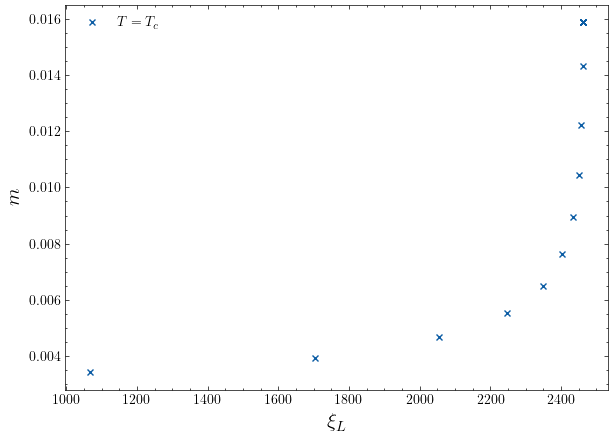

In [110]:
plt.figure(figsize=(7, 5))
plt.plot(xis, mags, "x", markersize=5, label = f"$T = T_c$")
plt.xlabel(r"$\xi_{L}$", fontsize=15)
plt.ylabel("$m$", fontsize=15)
plt.legend()
plt.show()

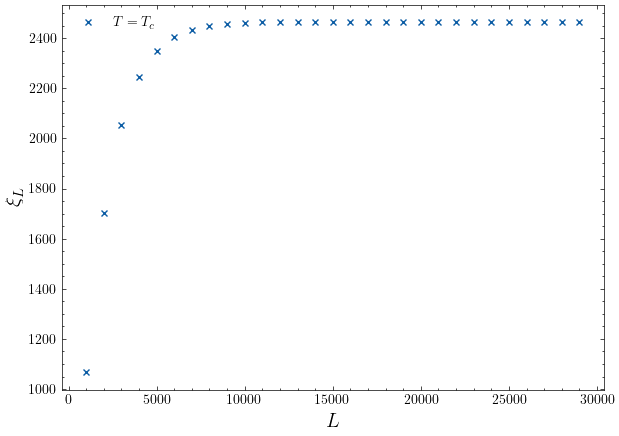

In [107]:
plt.figure(figsize=(7, 5))
plt.plot(sizes, xis, "x", markersize=5, label=f"$T = T_c$")
plt.ylabel(r"$\xi_{L}$", fontsize=15)
plt.xlabel("$L$", fontsize=15)
plt.legend()
plt.show()

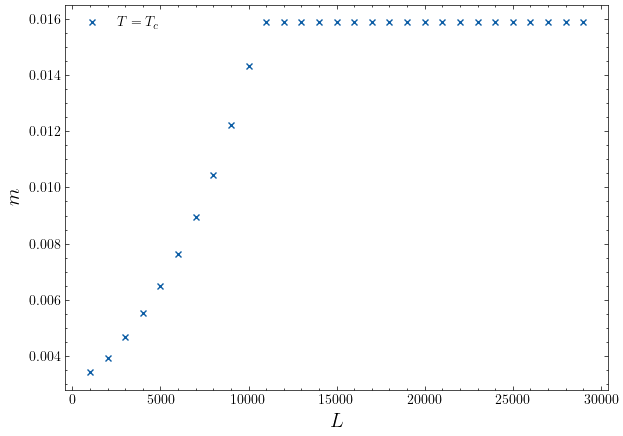

In [108]:
plt.figure(figsize=(7, 5))
plt.plot(sizes, mags, "x", markersize=5, label=f"$T = T_c$")
plt.ylabel(r"$m$", fontsize=15)
plt.xlabel("$L$", fontsize=15)
plt.legend()
plt.show()